<a href="https://colab.research.google.com/github/Zishan-Shao/duke_python_bootcamp/blob/main/FlipFlop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following is a case study testing a large range of skills we have used in the bootcamp. It is very open-ended so many solutions are possible. If you have no idea how to start, that is fine; the school year hasn't even started yet! This case study is meant to allow you to focus on which skills from the bootcamp you are most interested or would like the most review. It will help to write some ideas on paper first before writing any code. You can research as much as you'd like to solve the problem.

# Data Generating Process (Optional)

Below is the code used to generate the data for this case study. This code is essentially an answer key as it describes the distribution of the data completely. I would recommend trying to do the case study first, but feel free to read this code if you are stuck, want some initial inspiration, or just want to learn a bit more Python. To easily hide this entire section, click the arrow next to **Data Generating Process**.

In [3]:
import numpy as np

INTERESTS = """Abjure	Future	Picnic
Agonistic	Garland	Protect
Airline	Gigantic	Publish
Bandit	Goofy	Quadrangle
Banquet	Government	Recount
Binoculars	Grandnieces	Redoubtable
Biologist	Handbook	Reflection
Blackboard	Himself	Reporter
Board	Indulge	Ring
Bookworm	Inflatable	Salesclerk
Butterscotch	Inimical	Snapshot
Camera	Interim	Shellfish
Campus	Invest	Ship
Catfish	Jackpot	Significance
Carsick	Kitchenette	Sometimes
Celebrate	Law	Sublime
Celery	Life	Tabletop
Citizen	Lifeline	Teamwork
Coloring	Love	Tennis
Compact	Magnificent	Timesaving
Dark	Malevolence	Tree
Damage	Man	Termination
Dangerous	Mascot	Underestimate
Decorum	Marshmallow	Vineyard
Endorse	Mine	War
Engender	Moonwalk	Way
Erratic	Near	Wealth
Envelope	Nephogram	Wednesday
Etymology	Newborn	World
Eyewitness	Noisome	Xerox
Eulogy	Owl	You
Fish	Parenthesis	Zestful
Food	Perpetrator
Foreclose	Phone"""

rng = np.random.default_rng(2023)

INTERESTS = INTERESTS.replace("\n", " ").replace("\t", " ").split(" ")

rng.shuffle(INTERESTS)

INTERESTS = INTERESTS[:40]

STOPWORDS = """i
me
my
myself
it
its
itself
this
that
these
those
am
is
are
was
were
""".split("\n")


In [4]:
import numpy as np
from datetime import datetime

def generate_user(id):
  to_return = {"ID": id}
  to_return["Age"] = -1 if rng.random() < 0.2 else rng.integers(18, 60)
  # The below line of code is bad, but try to understand what it does
  to_return["Gender"] = -1 if rng.random() < 0.1 else ("M" if rng.random() < 0.5 else "F")
  to_return["Date"] = datetime.fromtimestamp(rng.integers(1674843213, 1690481613))
  probs = np.full(10, 5, dtype=np.double)
  probs[0] = 1
  probs[1] = to_return["Age"] if to_return["Age"] > 0 else rng.integers(18, 60)
  probs[2] = to_return["Date"].timestamp() / 1e9
  probs[3] = (61 - to_return["Age"])
  probs[4] = (40 - to_return["Age"]) ** 2
  probs[5] = 0 if to_return["Gender"] == "M" else 50
  probs[6] = 50 if to_return["Gender"] == "M" and to_return["Age"] > 30 else 0
  probs /= probs.sum()
  inv_probs = 1/(probs + 0.1)
  inv_probs /= inv_probs.sum()
  to_return["Interest1"] = rng.choice(INTERESTS[:10], p = probs)
  to_return["NonInterest1"] = rng.choice(INTERESTS[:10], p = inv_probs)
  more_probs = np.full(40, 5, dtype=np.double)
  more_probs[:10] = probs
  more_probs /= more_probs.sum()
  to_return["Bio"] = " ".join(map(lambda words: f"{words[0]} {words[1]}",
      zip(rng.choice(INTERESTS, p = more_probs, size=15),
          rng.choice(STOPWORDS, size=15))))

  return to_return


def generate_video(id, user):
  to_return = {"ID": id}
  to_return["Duration"] = np.clip(3, 60, rng.gamma(2, 15))
  to_return["User"] = user["ID"]
  to_return["Description"] = " ".join(rng.choice(user["Bio"].split(" "), size=20))
  for useless_category in range(5, 21):
    to_return[f"Category_{useless_category}"] = rng.choice(list("ABC"))

  to_return[f"Category_1"] = "A" if rng.random() < 0.8 and user["Gender"] == "M" else "B"
  to_return[f"Category_2"] = "A" if rng.random() < 0.7 and user["Age"] > 30 else "B"
  to_return[f"Category_3"] = "A" if user["Age"] > 30 and user["Gender"] == "F" else rng.choice(list("BC"))

  for useless_continuous in range(5, 27):
    to_return[f"Continuous_{useless_continuous}"] = rng.normal(0, 2)

  to_return["Continous_1"] = user["Date"].timestamp() / 1e10 * rng.random() + (1 if user["Gender"] != "F" else -1)
  to_return["Continous_2"] = np.random.normal() + (1.5 if user["Age"] < 30 else 0)
  to_return["Continous_3"] = np.random.normal() + (1.5 if user["Age"] > 40 else 0)
  to_return["Continous_4"] = np.random.normal() + (1 if user["Age"] > 40 else 0)

  to_return[f"Category_4"] = "A" if to_return["Continous_1"] > 0 else "B"

  return to_return

def generate_engagement(user, video):
  if video["User"] == user["ID"]:
      user[f"{video['ID']}_watched"] = 1
      user[f"{video['ID']}_liked"] = 1
      user[f"{video['ID']}_shared"] = 1
      user[f"{video['ID']}_commented"] = 1
      return

  user[f"{video['ID']}_seen"] = int(rng.random() < np.clip(1.5 * (user["Date"].timestamp() - 1674843213) / (1690481613 - 1674843213), 0, 0.9))

  if not user[f"{video['ID']}_seen"]:
      user[f"{video['ID']}_watched"] = 0
      user[f"{video['ID']}_liked"] = 0
      user[f"{video['ID']}_shared"] = 0
      user[f"{video['ID']}_commented"] = 0
      return

  if INTERESTS[10] in video["Description"]:
    user[f"{video['ID']}_watched"] = 0.9 + rng.random() * 0.1
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.8 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.4 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.4 else 0

  overlaps = set(video["Description"].split(" ")).intersection(user["Bio"].split(" "))
  overlaps = overlaps - set(STOPWORDS)

  if len(overlaps) > 6:
    user[f"{video['ID']}_watched"] = 0.8 + rng.random() * 0.2
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.9 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.8 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.4 else 0

  elif video["Category_1"] == "A" and len(overlaps) > 3:
    user[f"{video['ID']}_watched"] = 0.8 + rng.random() * 0.2
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.9 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.8 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.4 else 0

  elif video["Category_2"] == "A" and len(overlaps) > 2:
    user[f"{video['ID']}_watched"] = 0.8 + rng.random() * 0.2
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.9 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.8 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.4 else 0

  elif video["Category_3"] == "A" and len(overlaps) > 2:
    user[f"{video['ID']}_watched"] = 0.8 + rng.random() * 0.2
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.9 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.8 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.4 else 0

  elif video["Continous_2"] > 1.5:
    user[f"{video['ID']}_watched"] = 0.8 + rng.random() * 0.2
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.05 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.1 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.5 else 0

  elif video["Continous_3"] + video["Continous_1"] > 1.5:
    user[f"{video['ID']}_watched"] = 0.01 + rng.random() * 0.4
    if user[f"{video['ID']}_watched"] > 0.3:
      user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.05 else 0
      user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.05 else 0
      user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.05 else 0
    else:
      user[f"{video['ID']}_liked"] = 0
      user[f"{video['ID']}_shared"] = 0
      user[f"{video['ID']}_commented"] = 0

  elif len(overlaps) == 0:
    user[f"{video['ID']}_watched"] = 0.01 + rng.random() * 0.99

    if user[f"{video['ID']}_watched"] > 0.3:
      user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.15 else 0
      user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.15 else 0
      user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.15 else 0
    else:
      user[f"{video['ID']}_liked"] = 0
      user[f"{video['ID']}_shared"] = 0
      user[f"{video['ID']}_commented"] = 0

  else:
    user[f"{video['ID']}_watched"] = 0.3 + rng.random() * 0.7
    user[f"{video['ID']}_liked"] = 1 if rng.random() < 0.25 else 0
    user[f"{video['ID']}_shared"] = 1 if rng.random() < 0.25 else 0
    user[f"{video['ID']}_commented"] = 1 if rng.random() < 0.15 else 0

  if video["Duration"] > 40:
    less_engagement = rng.uniform() < 0.5
    user[f"{video['ID']}_watched"] /= 3 if less_engagement else 1
    user[f"{video['ID']}_liked"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_liked"]
    user[f"{video['ID']}_shared"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_shared"]
    user[f"{video['ID']}_commented"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_commented"]

  elif video["Duration"] > 20:
    less_engagement = rng.uniform() < 0.8
    user[f"{video['ID']}_watched"] /= 1.5 if less_engagement else 1
    user[f"{video['ID']}_liked"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_liked"]
    user[f"{video['ID']}_shared"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_shared"]
    user[f"{video['ID']}_commented"] = 0 if rng.uniform() < 0.8 and less_engagement else user[f"{video['ID']}_commented"]



users = [generate_user(id) for id in range(50)]
videos = [generate_video(id, rng.choice(users)) for id in range(200)]

for user in users:
  for video in videos:
    generate_engagement(user, video)


# FlipFlop

You have just gotten a job at a new social media company, FlipFlop. They have tasked you with designing an algorithm for suggesting videos to users. You are given two datasets, one with videos, and one with users. Each video has a vector of covariates describing its content and metadata. Each user also has a list of covariates describing their demographics, interests, and which videos in the dataset they engaged with. Engagement is measured with 5 covariates:

* `seen`: 1 if a user has had the video suggested or shown to them for any amount of time
* `watched`: Float between 0 and 1 measuring what percent of a video a user has watched
* `liked`: 1 if a user "liked" the video
* `commented`: 1 if a user commented on the video
* `shared`: 1 if a user shared the video

The video dataset has 200 videos, and 50 attributes per video. Each video has the following covariates:

* `ID`: Unique ID of the video
* `Duration`: Total duration of the video
* `User`: The user who made the video
* `Description`: Description of the video in question
* 20 Additional covariates that are categorical
* 26 Additional covariates that are continuous

The user dataset has 50 users, and 7 base attributes per user. However, each user has an additional 5 attributes per video describing their engagement.

* `ID`: Unique ID of the user
* `Age`: Age of the user, -1 if unknown
* `Gender`: `M` or `F` of a user, `X` if unknown or other
* `Date`: Datetime the user made their account
* `Interest1`: The user's top interest
* `NonInterest1`: The user's most hated interest
* `Bio`: A user's biography describing themselves
* `ABC1_seen`: User has seen video with ID `ABC1`
* `ABC1_watched`: User has watched a percent of video with ID `ABC1`
* ...and so on

## First Steps

1. Load the data in and peek at the first few rows
2. Think about how you want to measure engagement
3. Split the dataset into training, test, and validation sets

In [5]:
import pandas as pd
USERS = pd.DataFrame.from_records(users)
VIDEOS = pd.DataFrame.from_records(videos)

print("============================================")
print(VIDEOS.columns)
print("============================================")
print(VIDEOS.head)
print("============================================")
print(USERS)

Index(['ID', 'Duration', 'User', 'Description', 'Category_5', 'Category_6',
       'Category_7', 'Category_8', 'Category_9', 'Category_10', 'Category_11',
       'Category_12', 'Category_13', 'Category_14', 'Category_15',
       'Category_16', 'Category_17', 'Category_18', 'Category_19',
       'Category_20', 'Category_1', 'Category_2', 'Category_3', 'Continuous_5',
       'Continuous_6', 'Continuous_7', 'Continuous_8', 'Continuous_9',
       'Continuous_10', 'Continuous_11', 'Continuous_12', 'Continuous_13',
       'Continuous_14', 'Continuous_15', 'Continuous_16', 'Continuous_17',
       'Continuous_18', 'Continuous_19', 'Continuous_20', 'Continuous_21',
       'Continuous_22', 'Continuous_23', 'Continuous_24', 'Continuous_25',
       'Continuous_26', 'Continous_1', 'Continous_2', 'Continous_3',
       'Continous_4', 'Category_4'],
      dtype='object')
<bound method NDFrame.head of       ID   Duration  User                                        Description  \
0      0  13.950464   

## Exploratory Data Analysis

Do the following steps to get an idea of the data:

1. Try combining the datasets into 1 to help facilitate analysis
2. Find the top 5 videos in the dataset, do they have anything in common?
3. What covariates are correlated in the user and video datasets? Make some scatter plots.

In [68]:
# Part 1: Join two datasets
print("=============== Head of the Merged Data ======================")
Data = pd.merge(VIDEOS, USERS, left_on='User', right_on='ID') # let Video dataset join the User based on its ID
print(Data.head())

print("=============== Basic Info of the Data ======================")
print("Observations: ", Data.size)
print("Num Features: ", len(Data.columns))
print("Feature Names: ", [i for i in Data.columns])


=============== Head of the Merged Data ======================
  ID_x   Duration  User                                        Description  \
0    0  13.950464    34  Airline Garland am those Garland myself me am ...   
1  107  11.300317    34  Love Termination myself itself  Garland Catfis...   
2  109  60.000000    34  me Recount myself Tennis was Jackpot Garland T...   
3  137  27.698091    34  am  Dark myself Dark Termination   me Garland ...   
4  143   9.856128    34  Tennis  myself i Dark were Garland Garland me ...   

  Category_5 Category_6 Category_7 Category_8 Category_9 Category_10  ...  \
0          A          B          C          C          C           B  ...   
1          B          C          A          C          A           C  ...   
2          A          B          C          A          A           A  ...   
3          B          B          A          B          B           A  ...   
4          A          B          A          B          A           B  ...   

  199

In [59]:
# Part 2: Find the top 5 videos
# In this case, we have multiple top 5:
# Top 15 Active
most_active = Data[(Data['199_commented'] == 1) & (Data['199_shared'] == 1) & (Data['199_liked'] == 1)]
print("Number of most active videos:", len(most_active["Description"].unique()))
print("==================================================")
print(most_active.Description)

# Top 5 Length
print("==================================================")
print("Top 5 Viewed Longest")
print(Data[Data['199_watched'] == max(Data['199_watched'])].Description)


Number of most active videos: 15
61     Catfish itself Bandit Biologist myself Compact...
62     that me Bandit Bandit Lifeline it Termination ...
63     me Airline Dangerous is myself are that Bandit...
64     Zestful Significance Dangerous i is Airline ar...
65     Dangerous are Compact are me is Compact Biolog...
66     Bandit myself me is Termination Biologist Catf...
79     Airline those those Love Etymology Ring Ring t...
80     Zestful its Dark its me Etymology Decorum Ring...
81     its Love itself Decorum is Ring is this those ...
82     itself Ring me those those me that is were Ter...
83     Catfish my that  Airline itself Ring Catfish R...
108    these i these Biologist i were me  these Termi...
109    is me Tennis me were Bandit these i is i Lifel...
110    these Gigantic these Termination me these i me...
111    Tennis  those Tennis Termination were were Lif...
Name: Description, dtype: object
Top 5 Viewed Longest
79    Airline those those Love Etymology Ring Ring t...
80

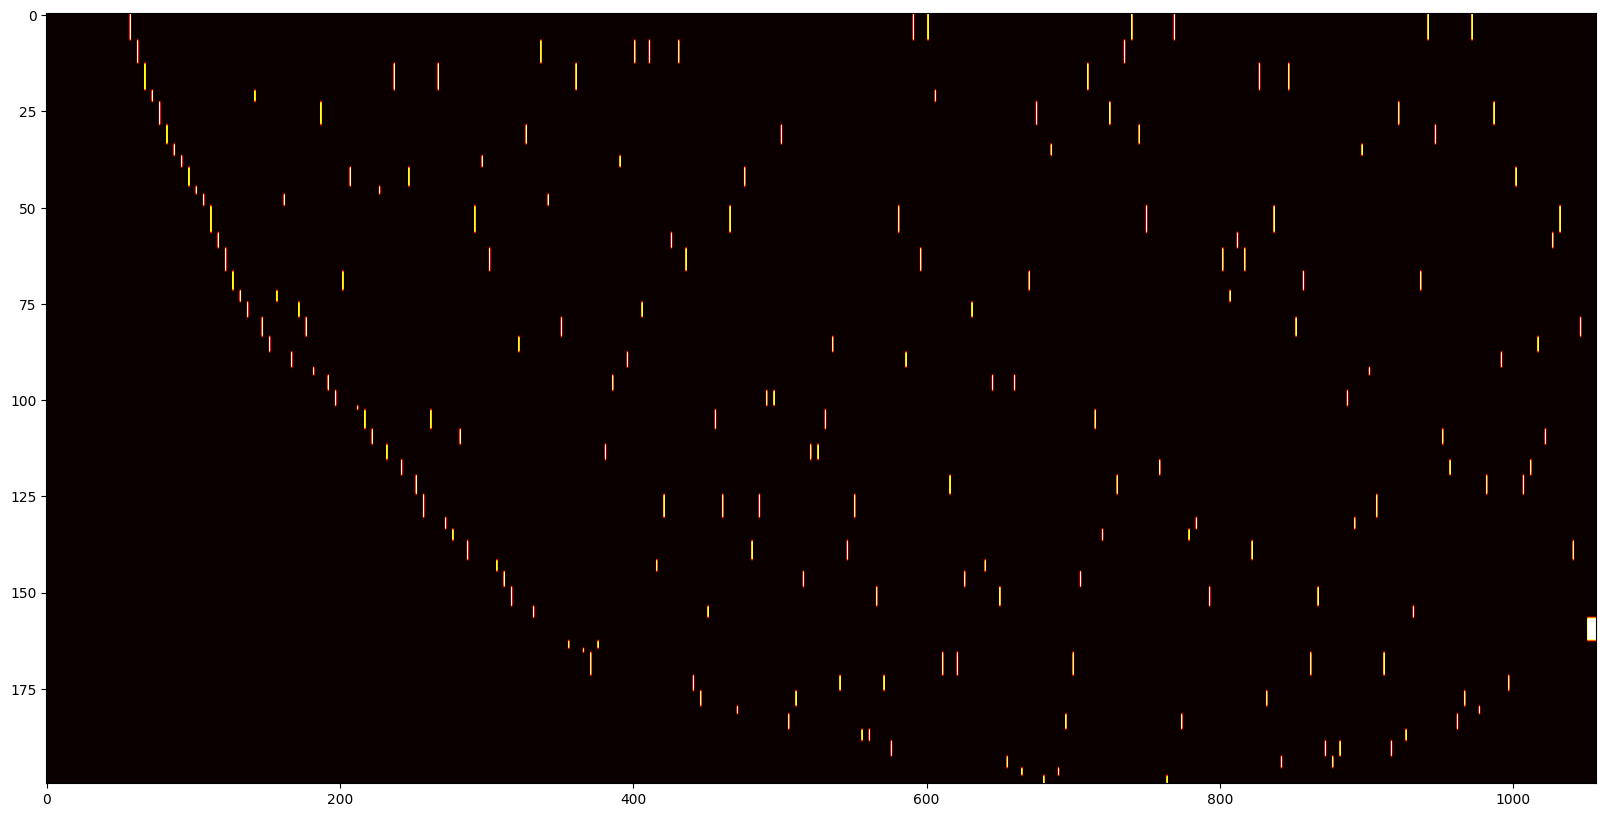

In [66]:
## Preliminary: Data Cleaning
## Step 1: Check if missing values
import pandas as pd
plt.rcParams["figure.figsize"] = (20, 10)
plt.imshow(Data.isnull(), cmap='hot', aspect='auto')
plt.show()

In [ ]:
## Convert String data to interpretable formats
for feature in Data.columns:
    if Data[feature].dtype == 'object':
        Data[feature] = pd.Categorical(Data[feature]).codes
    if Data[feature].dtype == 'str':
        Data[feature] = Data["feature"].str.lower()
    if Data[feature].dtype == 'bool':
        Data[feature] = Data[feature].astype(int)


In [70]:
# Inputting the missing values with mean values
Data = Data.fillna(0)

## provide insight of the values after processing them
print("=============== Description of Cleaned Data ======================")
print(Data.describe())

=============== Description of Cleaned Data ======================
         Duration        User  Continuous_5  Continuous_6  Continuous_7  \
count  200.000000  200.000000    200.000000    200.000000    200.000000   
mean    30.506252   25.080000      0.185529      0.029011     -0.281940   
min      1.254751    0.000000     -6.335391     -5.774901     -4.455130   
25%     15.297591   12.000000     -1.073217     -1.537438     -1.687503   
50%     27.790061   25.000000      0.222792      0.043238     -0.479329   
75%     44.062572   39.000000      1.496328      1.492539      1.069107   
max     60.000000   49.000000      4.788208      5.049755      4.815366   
std     17.239304   14.908889      1.898284      2.014770      2.016659   

       Continuous_8  Continuous_9  Continuous_10  Continuous_11  \
count    200.000000    200.000000     200.000000     200.000000   
mean       0.017448      0.273047      -0.270949       0.170983   
min       -4.789660     -5.640801      -5.505664      -5

In [ ]:
# Part 3: What covariates are correlated in the user and video datasets? Make some scatter plots.



## Feature Engineering

Are there any features in the datasets that would be better if converted to a different format? If so, improve them. Are there any additional features you want to add?

## Model Choice

Is this a regression or classification problem? Why?

## Initial Model

Describe an initial model to help you solve this problem. How does it do on the validation set? What are your metrics for evaluation?

## Cross-Validation

Perform cross-validation on the model by modifying a hyperparameter.

## Testing

Test your final model on the test set, are you satisfied with its performance?

# More to think about



## Modification 1: New User

A new user joins the site, what are the first videos they should be shown? What if you know nothing about the user yet?



## Modification 2: New Video

A new video is added to the site, and some of the users have had a chance to engage with the video. How would you update your algorithm?

## Modification 3: Many Users, Many Videos

The test dataset you received is somewhat small, but FlipFlop wants to be the most popular website on Earth! They ask you to modify your algorithm to scale to at least 1 billion users! What do you do?